In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the EIN and NAME Columns 
application_df= application_df.drop(columns=["EIN","NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Determine the number of unique values in each column
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning 
app_col = application_df["APPLICATION_TYPE"].value_counts()
app_col

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

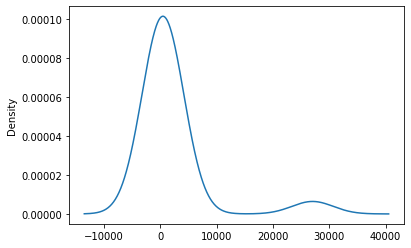

In [5]:
# Visualize the value counts of APPLICATION_TYPE 
application_df["APPLICATION_TYPE"].value_counts().plot.density()

In [6]:
# Replace bins into dataframe-APPLICATION 
replace_apps=app_col[app_col<800].index.tolist()

for app in replace_apps: 
  application_df.APPLICATION_TYPE=application_df.APPLICATION_TYPE.replace(app,"Other")

application_df.APPLICATION_TYPE.value_counts()


T3       27037
Other     2266
T4        1542
T6        1216
T5        1173
T19       1065
Name: APPLICATION_TYPE, dtype: int64

In [7]:
from IPython.core import application
# Check classification column
classification_col=application_df["CLASSIFICATION"].value_counts()
classification_col.head(50)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
C2190        1
C4200        1
C2600        1
C5200        1
C1370        1
Name: CLASSIFICATION, dtype: int64

In [8]:
from numpy.lib.shape_base import apply_along_axis
# Replace bins into dataframe-Classification
replace_class = classification_col[classification_col<800].index.to_list()

for chase in replace_class: 
  application_df.CLASSIFICATION=application_df.CLASSIFICATION.replace(chase,"Other")

application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Generate the categorical variable lists
application_cgl =application_df.dtypes[application_df.dtypes=="object"].index.tolist()

application_df[application_cgl].nunique()

APPLICATION_TYPE          6
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [10]:
# Create a OneHotEncoder instance 
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using categorical list 
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cgl]))

# Add the encoded variable names to the dataframe
encode_df.columns=enc.get_feature_names(application_cgl)

encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
# Merge One-Hot encoded features and drop the originals 
prep_application_df= application_df.merge(encode_df,left_index=True, right_index=True).drop(columns= application_cgl)


# Attempt One (Drop Noisy Features, Two Hidden Layers, 80, 30 Neurons)

In [12]:
# Going to delete columsnn unecessary and run NN

print(len(prep_application_df.columns))


41


In [13]:
# Going to drop the following columns 
temp_application_df=prep_application_df.drop(columns= ["USE_CASE_Other", "AFFILIATION_Other"])
temp_application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split the preprocessed data 
y = temp_application_df["IS_SUCCESSFUL"].values
X = temp_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)


In [15]:
# Create StandardScaler 
scaler = StandardScaler()

# Fit the StandardScaler 
X_scaler = scaler.fit(X_train)

#Scale the data 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3120      
                                                                 
 dense_1 (Dense)             (None, 80)                6480      
                                                                 
 dense_2 (Dense)             (None, 1)                 81        
                                                                 
Total params: 9,681
Trainable params: 9,681
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Compile the model 
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create callback that saves every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

#Evaluate results
model_loss, model_accuracy= nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 5s 4ms/step - loss: 0.5742 - accuracy: 0.7193
Epoch 2/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5610 - accuracy: 0.7279
Epoch 3/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5569 - accuracy: 0.7275
Epoch 4/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5555 - accuracy: 0.7304
Epoch 5/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5543 - accuracy: 0.7310
Epoch 6/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5533 - accuracy: 0.7325
Epoch 7/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5523 - accuracy: 0.7318
Epoch 8/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5513 - accuracy: 0.7322
Epoch 9/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5511 - accuracy: 0.7322
Epoch 10/200
858/858 [==============================] - 3s 4ms/step - loss: 0.5500 - accura

# Attempt Two With Three Hiden Layers 
# (80, 30, and 15 Neurons)

In [18]:
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_node3= 15

nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn2.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn2.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3120      
                                                                 
 dense_4 (Dense)             (None, 80)                6480      
                                                                 
 dense_5 (Dense)             (None, 15)                1215      
                                                                 
 dense_6 (Dense)             (None, 1)                 16        
                                                                 
Total params: 10,831
Trainable params: 10,831
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Compile the model 
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
import os
from tensorflow.keras.callbacks import ModelCheckpoint
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn2.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5734 - accuracy: 0.7224
Epoch 2/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5586 - accuracy: 0.7301
Epoch 3/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5574 - accuracy: 0.7300
Epoch 4/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5548 - accuracy: 0.7301
Epoch 5/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5535 - accuracy: 0.7333
Epoch 6/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5526 - accuracy: 0.7323
Epoch 7/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5512 - accuracy: 0.7343
Epoch 8/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5517 - accuracy: 0.7328
Epoch 9/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5497 - accuracy: 0.7339
Epoch 10/200
858/858 [==============================] - 5s 6ms/step - loss: 0.5499 - accura

# Attempt Three 
# Going Back To The Original Data and Redistributed Neurons 


In [20]:
# Split the preprocessed data 
y = temp_application_df["IS_SUCCESSFUL"].values
X = temp_application_df.drop(columns=["IS_SUCCESSFUL"]).values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [21]:
# Create StandardScaler
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data 
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 35
hidden_node3=10

nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))
# Second hidden layer
nn3.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="relu"))

# Third Hidden Layer
nn3.add(tf.keras.layers.Dense(units= hidden_node3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                3120      
                                                                 
 dense_8 (Dense)             (None, 80)                6480      
                                                                 
 dense_9 (Dense)             (None, 10)                810       
                                                                 
 dense_10 (Dense)            (None, 1)                 11        
                                                                 
Total params: 10,421
Trainable params: 10,421
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compile the model 
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn3.fit(X_train_scaled, y_train, epochs=200, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5713 - accuracy: 0.7215
Epoch 2/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5568 - accuracy: 0.7275
Epoch 3/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5552 - accuracy: 0.7289
Epoch 4/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5539 - accuracy: 0.7294
Epoch 5/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5530 - accuracy: 0.7305
Epoch 6/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5523 - accuracy: 0.7315
Epoch 7/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5506 - accuracy: 0.7325
Epoch 8/200
858/858 [==============================] - 4s 4ms/step - loss: 0.5508 - accuracy: 0.7312
Epoch 9/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5500 - accuracy: 0.7336
Epoch 10/200
858/858 [==============================] - 4s 5ms/step - loss: 0.5500 - accura

# Attempt Four Activation Functions are Changed 

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input = len(X_train[0])
hidden_nodes1 = 80
hidden_nodes2 = 30
hidden_nodes3=15
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes1, input_dim = num_input,
                                    activation ="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units = hidden_nodes1, activation="sigmoid"))

# Third Hidden Layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes3, activation="sigmoid"))

# Output layer
nn4.add(tf.keras.layers.Dense(units = 1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 80)                3120      
                                                                 
 dense_12 (Dense)            (None, 80)                6480      
                                                                 
 dense_13 (Dense)            (None, 15)                1215      
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 10,831
Trainable params: 10,831
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Compile the model 
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics= ["accuracy"])

# Create a Callback that saves the weights every 5 epochs
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"
cp_callback= ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, save_freq=5)

# Train the model
fit_model= nn4.fit(X_train_scaled, y_train, epochs=100, verbose=1, callbacks=[cp_callback])

# Evaluate Results
model_loss, model_accuracy= nn4.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss:{model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5842 - accuracy: 0.7137
Epoch 2/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5605 - accuracy: 0.7303
Epoch 3/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5574 - accuracy: 0.7309
Epoch 4/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5560 - accuracy: 0.7312
Epoch 5/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5542 - accuracy: 0.7316
Epoch 6/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5533 - accuracy: 0.7321
Epoch 7/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5521 - accuracy: 0.7327
Epoch 8/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5517 - accuracy: 0.7323
Epoch 9/100
858/858 [==============================] - 4s 4ms/step - loss: 0.5517 - accuracy: 0.7323
Epoch 10/100
858/858 [==============================] - 4s 5ms/step - loss: 0.5505 - accura

In [26]:
# Export the model to an HDF5 file 
nn2.save("AlphabetSoupCharity_Optimization.h5")

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
